In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data2=data.copy()

In [4]:
label=data.iloc[0:len(data)+1,0]
#print(label)
type(label)

pandas.core.series.Series

In [5]:
#type(label)
label=np.array(label)
print(label)
label.shape
#type(label)

[1 0 1 ... 7 6 9]


(42000,)

In [6]:
features=data.iloc[0:len(data)+1,1:len(data)]
#print(features)
features=np.array(features)
print(features)
features.shape
#features.value_counts()
#features[1].shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(42000, 784)

In [7]:
#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.30)
X_test.shape

(12600, 784)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
#X_train_float = X_train.astype('float64')
img_pipeline = Pipeline([('norm', MinMaxScaler()),
                         ('classify', DecisionTreeClassifier()),
                        ])
print("Training model...")
clf = img_pipeline.fit(X_train, Y_train)

print('classifier trained!')


Training model...
classifier trained!


In [9]:
from sklearn import metrics
print('Classifier Metrics:')
predictions = clf.predict(X_test)
print(predictions)
#print(metrics.classification_report(Y_test, predictions))
#print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions)))


Classifier Metrics:
[3 5 7 ... 7 8 8]



 Confusion Matrix:


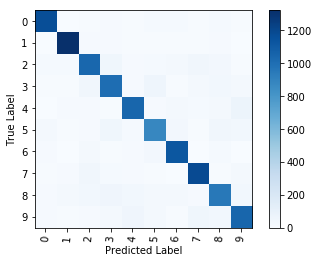

In [10]:
print("\n Confusion Matrix:")
cm = confusion_matrix(Y_test, np.round(predictions, 0))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
data1=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data=data1.copy()
test_data=np.array(test_data)
print(test_data)
test_data.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(28000, 784)

In [12]:
from sklearn import metrics

pred=clf.predict(test_data)
res=pd.DataFrame()
res['ImageID']=np.arange(1,28001)
res['Label']=pred
res.to_csv('output.csv',index=False)
